In [1]:
bd = '/content/drive/MyDrive/emp_automovel.csv'

In [2]:
import pandas as pd
dados = pd.read_csv(bd)
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [3]:
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

In [4]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(x, y)

modelo.score(x, y)

1.0

In [5]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


In [6]:
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [7]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8487065586621374


In [8]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9206155632984901
Acurácia de validação: 0.9056702377841651


In [9]:
from sklearn.metrics import confusion_matrix
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10356   123]
 [  960    42]]


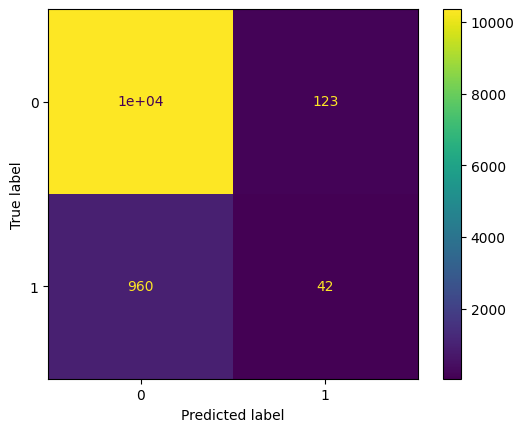

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

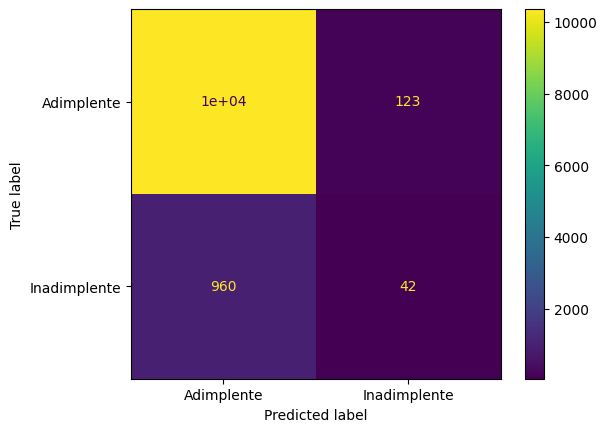

In [11]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente','Inadimplente'])
visualizacao.plot();
#Com essa visualização foi importante para vermos que a acurácia não foi a melhor métrica para usarmos, visto que ele classificou a maioria dos inadimplentes errado. 820 errados e 32 corretos.

In [12]:
from sklearn.metrics import accuracy_score
print(f'Acurárica: {accuracy_score(y_val, y_previsto)}')

Acurárica: 0.9056702377841651


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Precisão: {precision_score(y_val, y_previsto)}') #Métrica de deixar de vender
print(f'Recall: {recall_score(y_val, y_previsto)}') #Métrica de prejuízo para a empresa pois vai emprestar para inadimplentes.
print(f'F1 Score: {f1_score(y_val, y_previsto)}') #Equilibrio entre as duas anteriores

Precisão: 0.2545454545454545
Recall: 0.041916167664670656
F1 Score: 0.07197943444730077


AUC : 0.5150892032139558


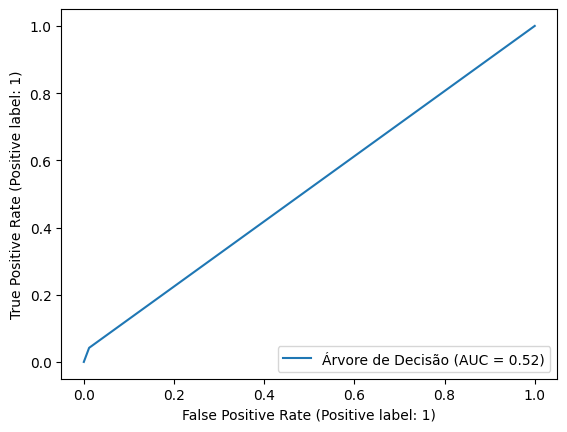

In [14]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, PrecisionRecallDisplay
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');
print(f'AUC : {roc_auc_score(y_val, y_previsto)}') #Equilibrio entre as duas anteriores

AP : 0.0942859796714147


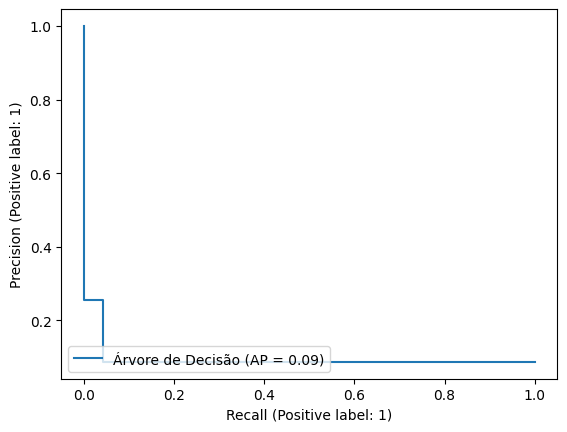

In [15]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');
from sklearn.metrics import average_precision_score
print(f'AP : {average_precision_score(y_val, y_previsto)}')

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [19]:
from sklearn.model_selection import cross_validate, KFold
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.78387046, 0.63448167, 0.66815853, 0.74272561, 0.72975564]),
 'score_time': array([0.01338458, 0.01320505, 0.02500844, 0.0143714 , 0.01413751]),
 'test_score': array([0.91311922, 0.90766551, 0.90744774, 0.91332753, 0.89960801])}

In [20]:
#cv_resultados['test_score']
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiaça: {media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)} ')

Intervalo de confiaça: 0.8982272661919404, 0.9182399324484727 


In [23]:
def intervalo_conf(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()
  print(f'Intervalo de confiaça: {media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)} ')

In [24]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.33285379, 0.33915949, 0.41097999, 0.42481351, 0.34997821]),
 'score_time': array([0.01368022, 0.01316547, 0.01904559, 0.01314187, 0.01406479]),
 'test_score': array([0.02642008, 0.02227723, 0.02091021, 0.01436031, 0.02312139])}

In [25]:
intervalo_conf(cv_resultados)

Intervalo de confiaça: 0.013481628105608304, 0.029354058568097682 


In [28]:
dados['inadimplente'].value_counts(normalize = True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [30]:
from sklearn.model_selection import StratifiedKFold
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')


In [31]:
intervalo_conf(cv_resultados)

Intervalo de confiaça: 0.02094797332173528, 0.033926700169318605 


In [33]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)
y_balanceado.value_counts(normalize = True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [36]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf, scoring = 'recall')

In [37]:
intervalo_conf(cv_resultados)

Intervalo de confiaça: 0.7067096182034224, 0.7611757776789229 


In [47]:
from imblearn.pipeline import Pipeline as imbpipeline
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')
intervalo_conf(cv_resultados)

Intervalo de confiaça: 0.20766421474556757, 0.2862302625443537 


In [48]:
from imblearn.under_sampling import NearMiss
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')
intervalo_conf(cv_resultados)

Intervalo de confiaça: 0.6246695779903281, 0.6993356399261791 


              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



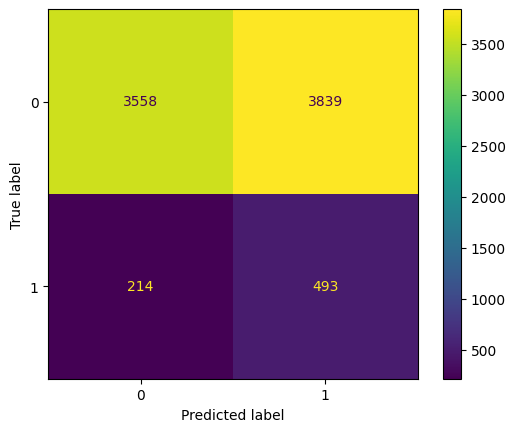

In [51]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);